### 구상 지표 만들기
- 필요 정보
날짜별 - 시세, 감정지수()

- 추천기준이되는 정보

개인의 투자 기간 n = 예)1주/1달/3달/6달  <--- 주식과 달리 7일,   n= 7,30,90,180

주기는 2*n 로 평균이동선 측정. 왜냐면 저점에서 고점에 판다라고 생각(주기의 반)  그누구도 고점에사서 고점에 팔지 않기 때문

함수가 필요한 평균이동선 = 2*n

**감정지수 마찬가지

- 결국 이동평균선에 따라 z밸류를 각각 구하고 그 평균을 저장


### 구상-지표로 분류 순번 지정
z밸류를 제곱하여 기간에 의해 평균을 낸다. 

- 어느범위의 값들을 제곱루트평균낼지 지정 
- 이 값들을 새로운 하나의 테이블로 구성시킨다.
- 순위를 부여한다.

### 구상-순번 지정값에 의거해서 추천 로직, 아웃풋 까지

- 순위에따라 가상의 순서를 부여받은 것을 추천로직의 인풋에따라 함수를 지나 점수를 받는다.
- 함수는 우상,중앙 볼록한,우하
- 최종적으로 최고의 점수를 갖는 암호화패(주식을) 분류 할수 있다.
- 그리고 그 것을 아웃풋한다.

## I. 패키지 밎 자료 불러오기

In [14]:
!pip install pymysql
!pip install sqlalchemy

     |████████████████████████████████| 43 kB 2.3 MB/s 


In [15]:
import warnings
warnings.filterwarnings('ignore')
import time
import datetime
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import operator

import base64
from io import BytesIO

from datetime import datetime, timedelta

### 1) 나중에 데이터베이스 커리해서 가져오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_market/Bitcoin.csv'

-rw------- 1 root root 24702 Nov 16 07:18 '/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_market/Bitcoin.csv'


In [108]:
BTC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/cryptocurrency_market/Bitcoin.csv')

In [109]:
BTC

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 12, 2021","64,134.5","64,782.6","65,449.7","62,309.7",63.27K,-1.04%
1,"Nov 11, 2021","64,806.7","64,922.8","65,583.3","64,121.9",50.37K,-0.19%
2,"Nov 10, 2021","64,932.6","66,942.6","68,990.6","62,951.3",96.21K,-2.95%
3,"Nov 09, 2021","66,904.4","67,528.7","68,493.3","66,334.9",66.13K,-0.92%
4,"Nov 08, 2021","67,527.9","63,276.4","67,763.3","63,276.4",81.08K,6.72%
...,...,...,...,...,...,...,...
311,"Jan 05, 2021","33,991.5","32,015.4","34,414.7","30,010.5",202.13K,6.15%
312,"Jan 04, 2021","32,022.6","33,016.6","33,587.5","28,204.5",255.27K,-2.84%
313,"Jan 03, 2021","32,958.9","32,192.9","34,755.9","32,029.6",155.21K,2.38%
314,"Jan 02, 2021","32,193.3","29,359.7","33,233.5","29,008.0",240.87K,9.65%


### 2) 변수 정의

In [110]:
n = [7,14,30,60,180]
crypto = [BTC]
crypto_name = ['BTC']
bounds = [30,60,180,360,720]

In [111]:
B = []
for j,k in zip(crypto,crypto_name) :
  for i in range(len(j)):
    x = j['Price'][i]
    date_time_obj = datetime.strptime(j['Date'][i], '%b %d, %Y')
    a = date_time_obj.strftime("%Y-%m-%d")
    Y = [a,x]
    B.append(Y)
  globals()[k] = pd.DataFrame(B)
  globals()[k].columns = ['date','price']
  # globals()[k] = globals()[k].set_index('date')
  print('완료')

완료


In [112]:
DF_price = BTC

In [113]:
for i in range(len(DF_price['price'])):
  DF_price['price'][i] = DF_price['price'][i].replace(',','')

In [114]:
for i in range(len(DF_price['price'])):
  DF_price['price'][i] = pd.to_numeric(DF_price['price'][i], downcast = 'float')

In [115]:
DF_price

,date,price
0,2021-11-12,64134.5
1,2021-11-11,64806.7
2,2021-11-10,64932.6
3,2021-11-09,66904.4
4,2021-11-08,67527.9
...,...,...
311,2021-01-05,33991.5
312,2021-01-04,32022.6
313,2021-01-03,32958.9
314,2021-01-02,32193.3


In [116]:
DF = DF_price

## -------------여기까지 DB 데이터 불러오기

## II. 이동평균선 작업

In [117]:
  for i in n:
    DF_price['MA{0};'.format(i)]= DF_price['price'].rolling(window=i).mean().shift(-(i-1))
    print('완료', 'MA{0};'.format(i))

완료 MA7;
완료 MA14;
완료 MA30;
완료 MA60;
완료 MA180;


In [120]:
DF_price.tail(20)

,date,price,MA7;,MA14;,MA30;,MA60;,MA180;
296,2021-01-20,35476.3,36567.571429,37241.371373,NaN,NaN,NaN
297,2021-01-19,36002.9,36839.842634,37335.435547,NaN,NaN,NaN
298,2021-01-18,36613.2,36564.585938,37191.764230,NaN,NaN,NaN
299,2021-01-17,35839.6,36411.886161,36863.864258,NaN,NaN,NaN
300,2021-01-16,36019.5,36747.971540,36658.099749,NaN,NaN,NaN
301,2021-01-15,36845.8,37338.314174,36384.799805,NaN,NaN,NaN
302,2021-01-14,39175.7,37874.528460,35850.092634,NaN,NaN,NaN
303,2021-01-13,37382.2,37915.171317,NaN,NaN,NaN,NaN
304,2021-01-12,34076.1,37831.028460,NaN,NaN,NaN,NaN
305,2021-01-11,35544.3,37818.942522,NaN,NaN,NaN,NaN


In [121]:
DF = DF_price

## III.표준편차,Z밸류 작업

In [123]:
for i in n :
  DF_price['MA{0};SD;'.format(i)]=DF_price['price'].rolling(window=i).std().shift(-(i-1))
for i in n :
  DF_price['MA{0};z_value;'.format(i)] = (DF_price['price']-DF_price['MA{0};'.format(i)])/(DF_price['MA{0};SD;'.format(i)])

In [125]:
DF = DF_price

In [129]:
DF_price

,date,price,MA7;,MA14;,MA30;,MA60;,MA180;,MA7;SD;,MA14;SD;,MA30;SD;,MA60;SD;,MA180;SD;,MA7;z_value;,MA14;z_value;,MA30;z_value;,MA60;z_value;,MA180;z_value;
0,2021-11-12,64134.5,64723.313616,63261.092913,62303.226953,55205.396875,44802.338987,2066.273843,2160.468026,2249.651730,8204.892772,10032.634064,-0.284964,0.404268,0.814025,1.08827,1.92693
1,2021-11-11,64806.7,64271.856585,63125.971540,62078.080339,54885.646875,44703.960645,2513.252447,2160.796810,2393.453190,8224.823724,9928.285760,0.212809,0.777828,1.14003,1.20623,2.02479
2,2021-11-10,64932.6,63786.985491,62824.243025,61785.053646,54573.240234,44603.416764,2712.385480,2202.575375,2578.817399,8197.544149,9814.555164,0.422365,0.957224,1.22054,1.26372,2.07133
3,2021-11-09,66904.4,63499.256696,62360.350167,61536.543620,54243.728516,44519.567871,2677.203946,2399.482424,2623.866823,8171.391168,9703.751997,1.2719,1.89376,2.04578,1.54939,2.30682
4,2021-11-08,67527.9,62973.156808,61889.378906,61129.320312,53876.035221,44424.013444,2219.200533,2062.384537,2708.693002,8087.969054,9565.797465,2.05242,2.73398,2.36224,1.68792,2.41526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2021-01-05,33991.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,2021-01-04,32022.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2021-01-03,32958.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2021-01-02,32193.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## IV. EDA z_value

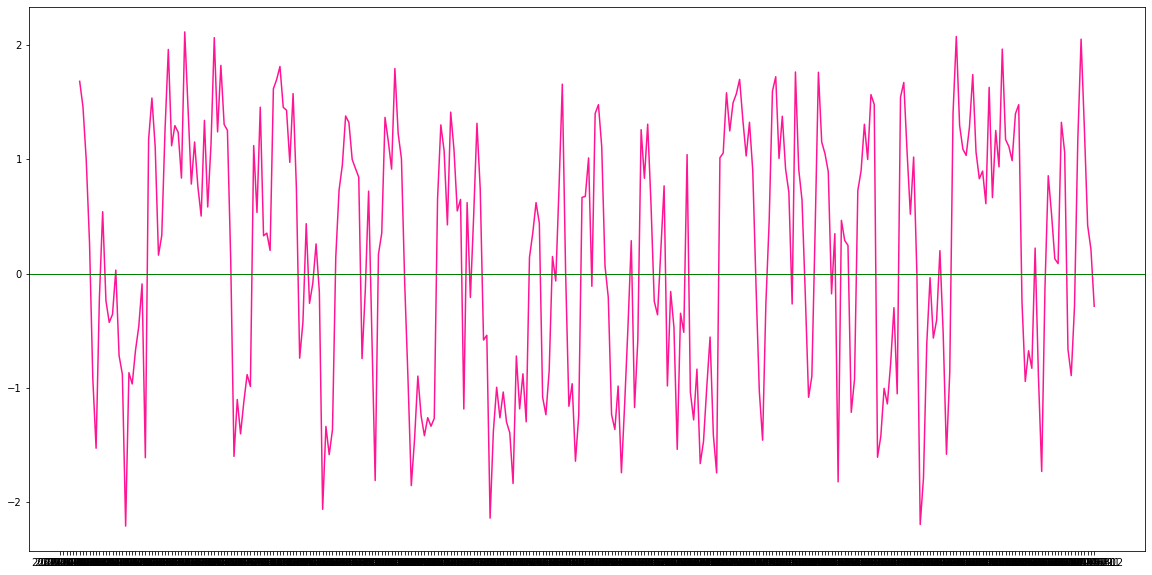

In [149]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA7;z_value;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()


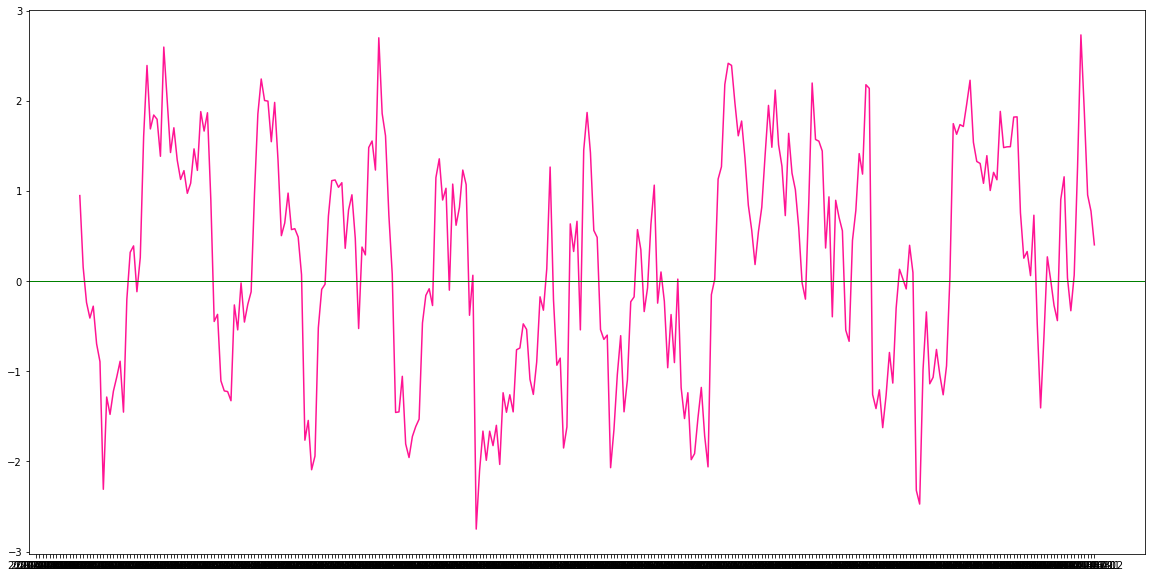

In [150]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA14;z_value;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()



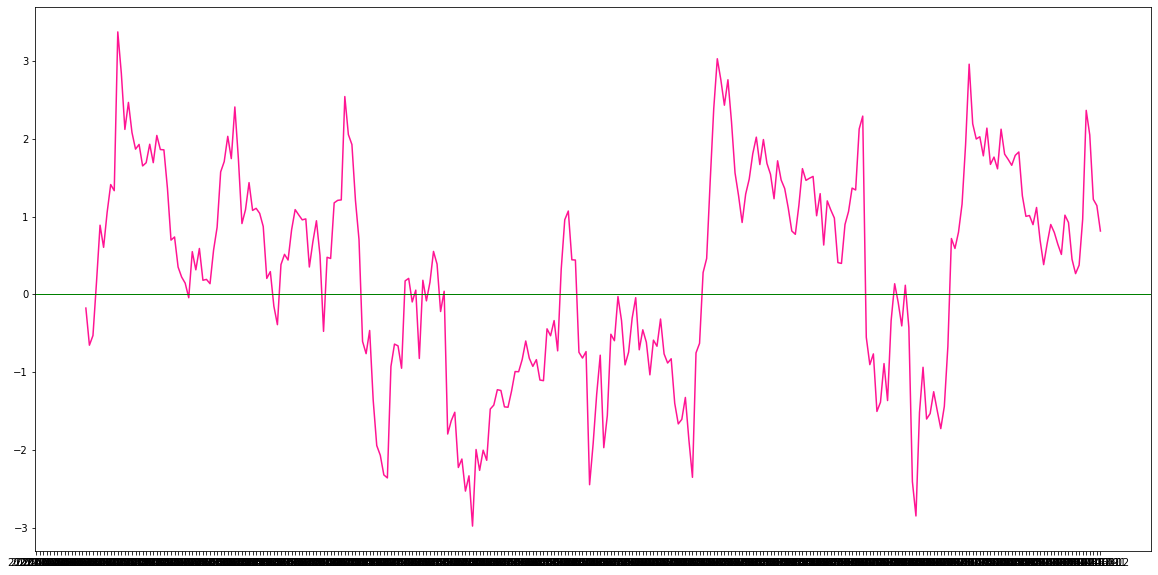

In [151]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA30;z_value;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()


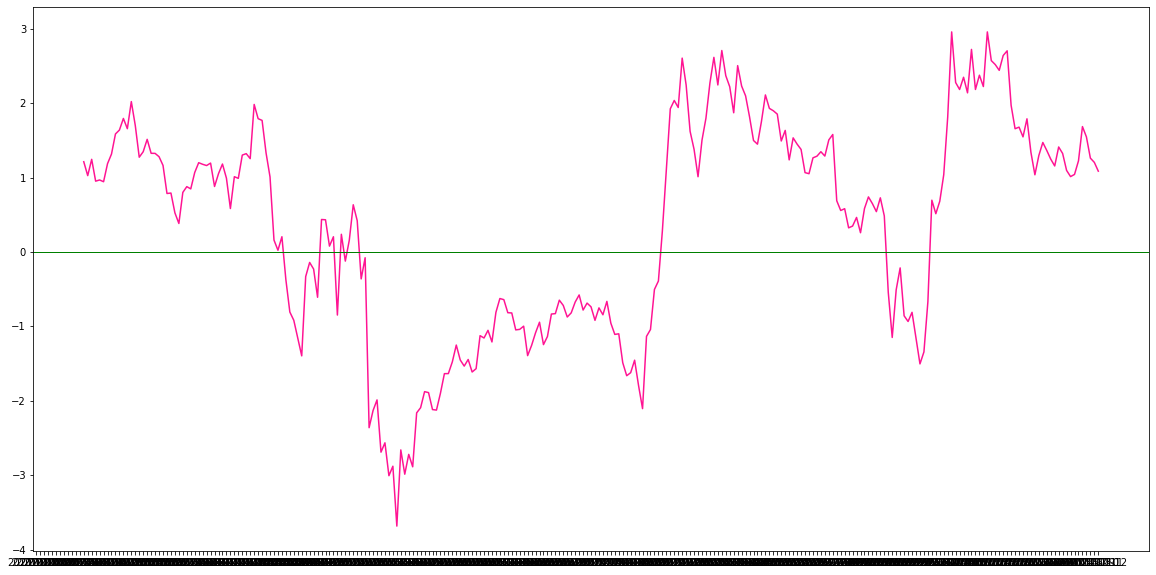

In [152]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA60;z_value;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()

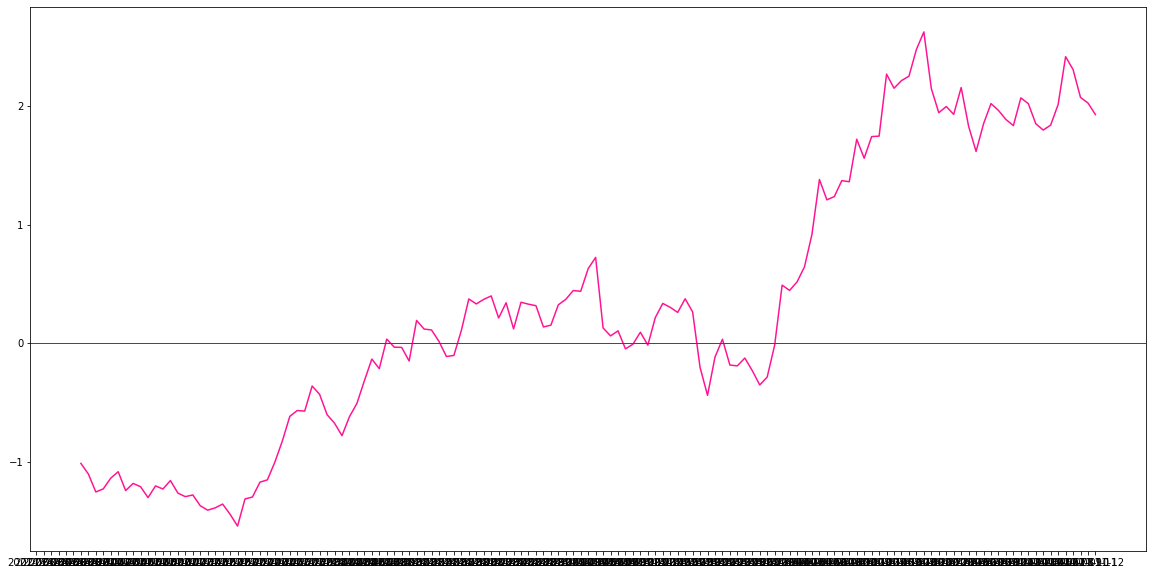

In [153]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA180;z_value;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()

## V. z_value 평균이동선 작업밎 EDA

In [161]:
  for i in n:
    DF_price['MA{0};z_value;MA{0};'.format(i)]= DF_price['MA{0};z_value;'.format(i)].rolling(window=i).mean().shift(-(i-1))
    print('완료', 'MA{0};''MA{0};z_value;MA{0};'.format(i))

완료 MA7;MA7;z_value;MA7;
완료 MA14;MA14;z_value;MA14;
완료 MA30;MA30;z_value;MA30;
완료 MA60;MA60;z_value;MA60;
완료 MA180;MA180;z_value;MA180;


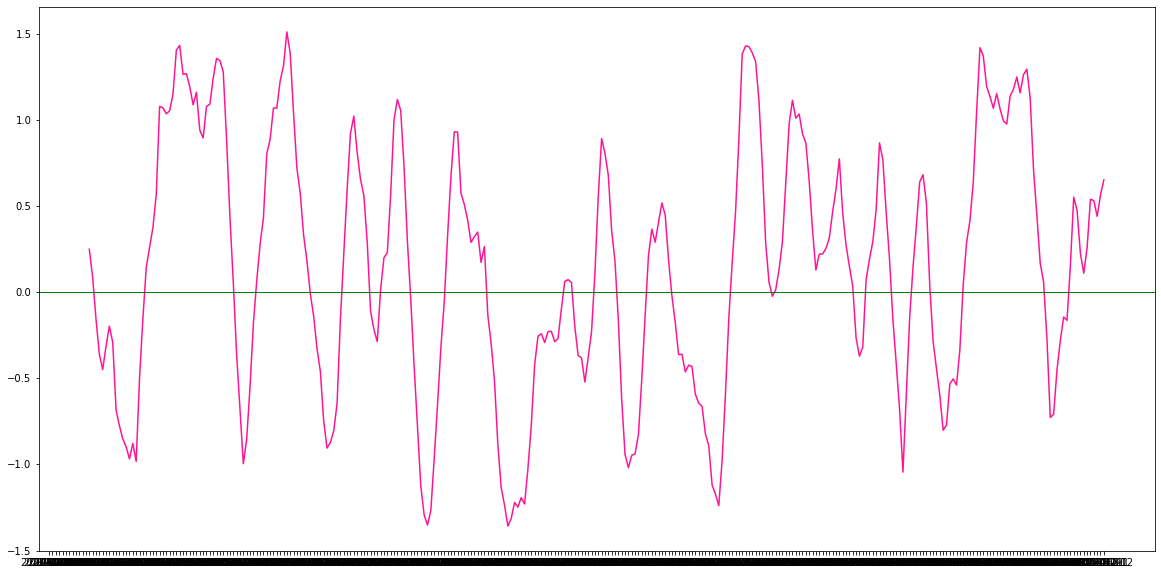

In [162]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA7;z_value;MA7;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()


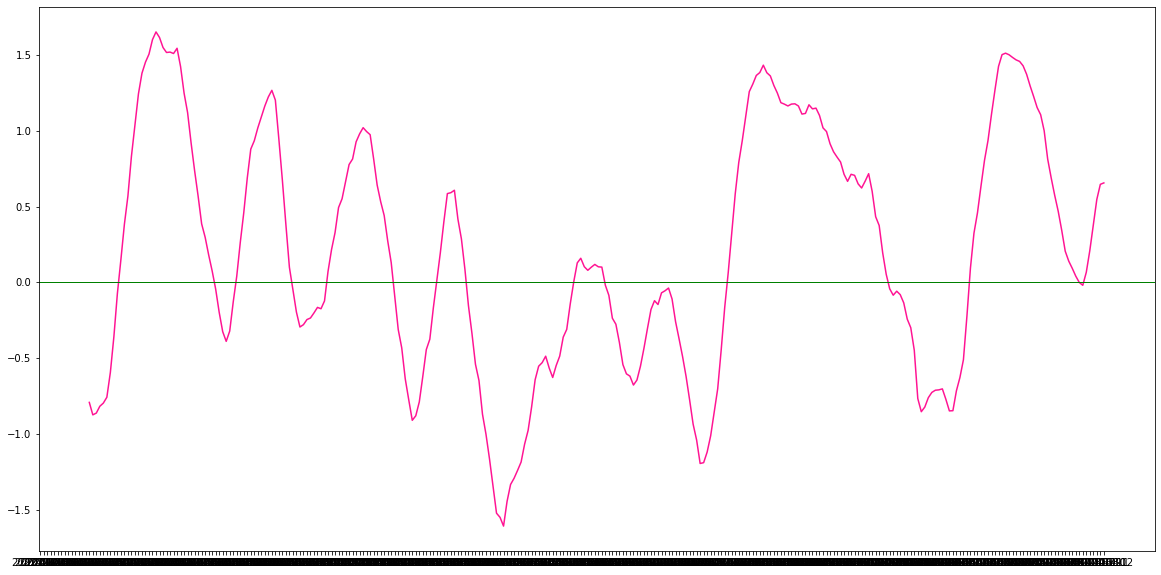

In [163]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA14;z_value;MA14;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()

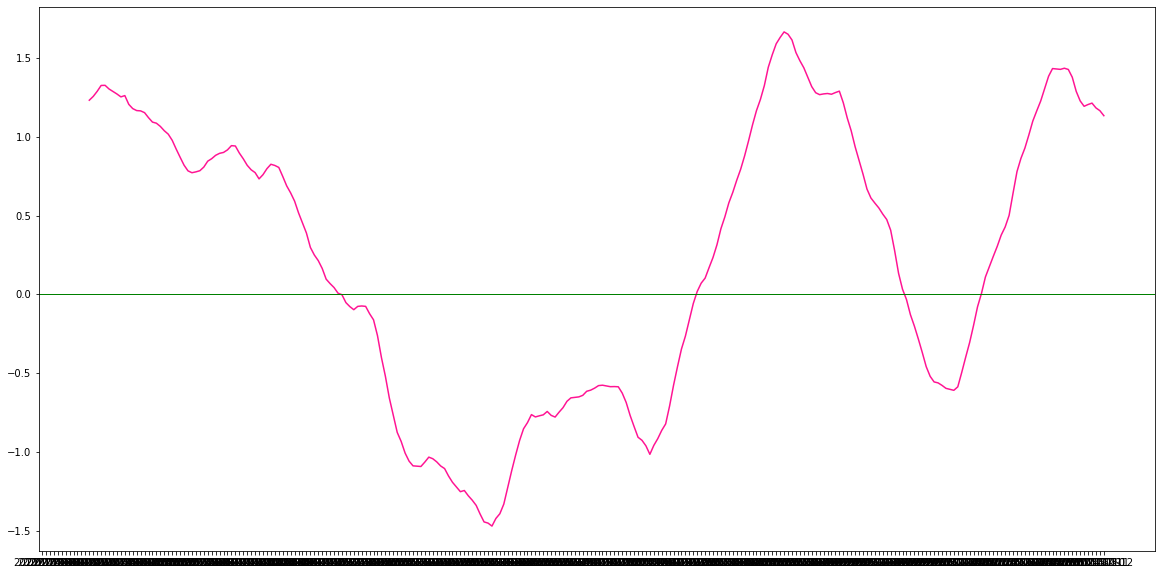

In [164]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA30;z_value;MA30;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()

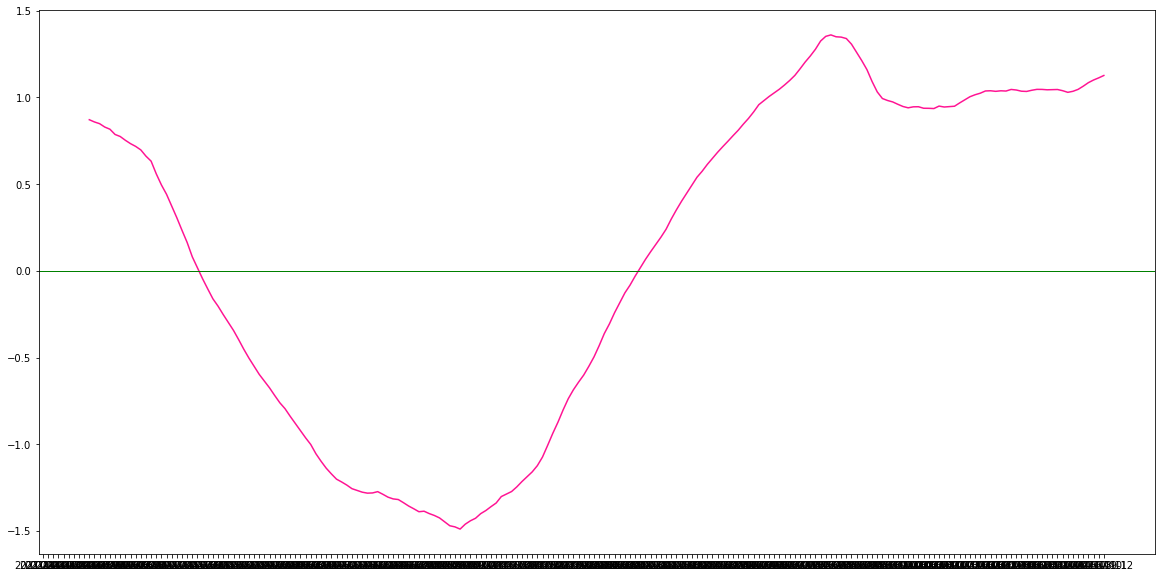

In [165]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA60;z_value;MA60;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()

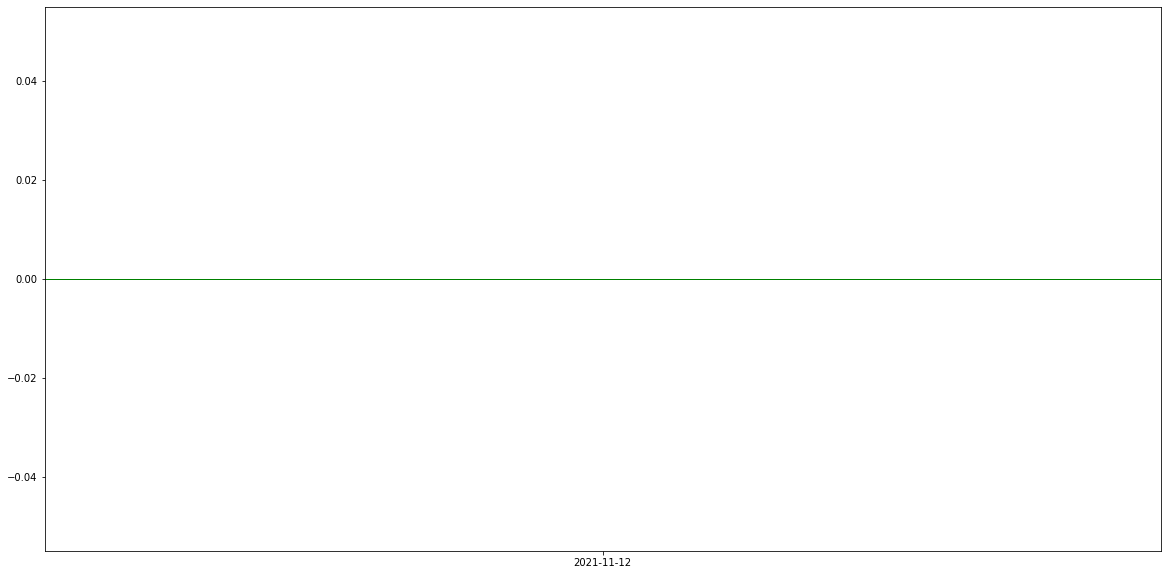

In [166]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['MA180;z_value;MA180;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=0, color='g', linewidth=1)

plt.show()

## V. 이격도 작업

In [141]:
DF_price['disparity7;']= DF_price['price']/DF_price['MA7;']

In [143]:
DF_price['disparity14;']= DF_price['price']/DF_price['MA14;']

In [154]:
DF_price['disparity30;']= DF_price['price']/DF_price['MA30;']

In [155]:
DF_price['disparity60;']= DF_price['price']/DF_price['MA60;']

In [156]:
DF_price['disparity180;']= DF_price['price']/DF_price['MA180;']

## VI.EDA disparity

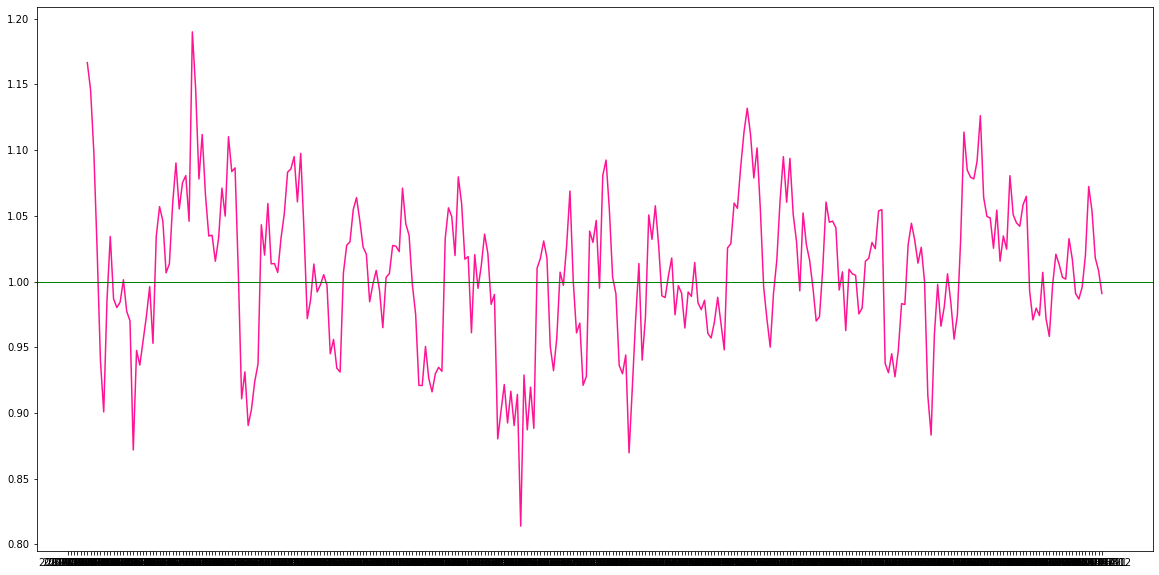

In [145]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['disparity7;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=1, color='g', linewidth=1)

plt.show()


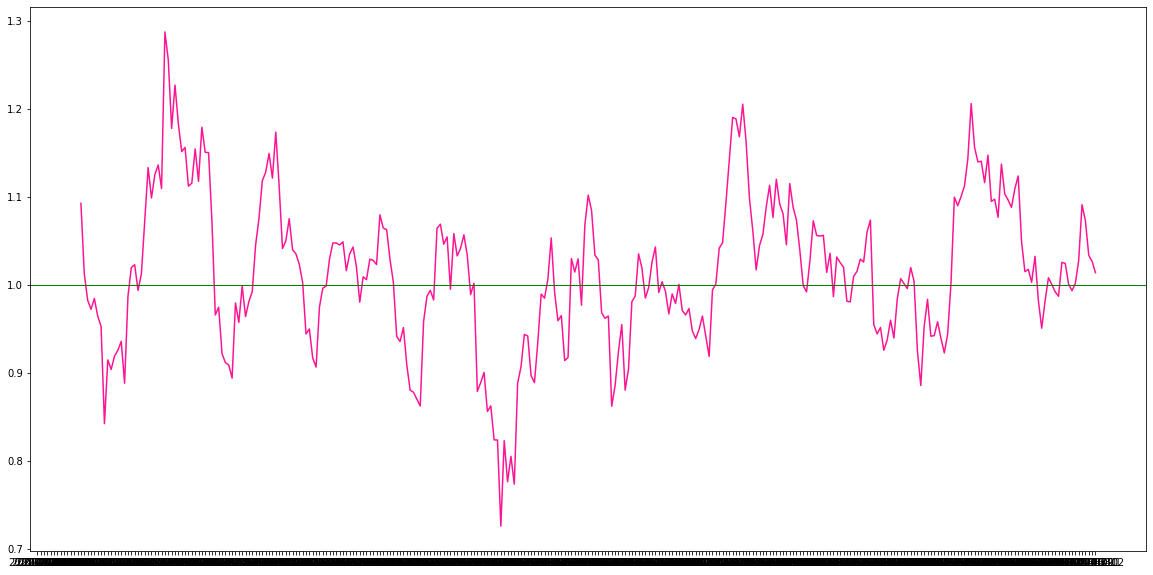

In [157]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['disparity14;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=1, color='g', linewidth=1)

plt.show()


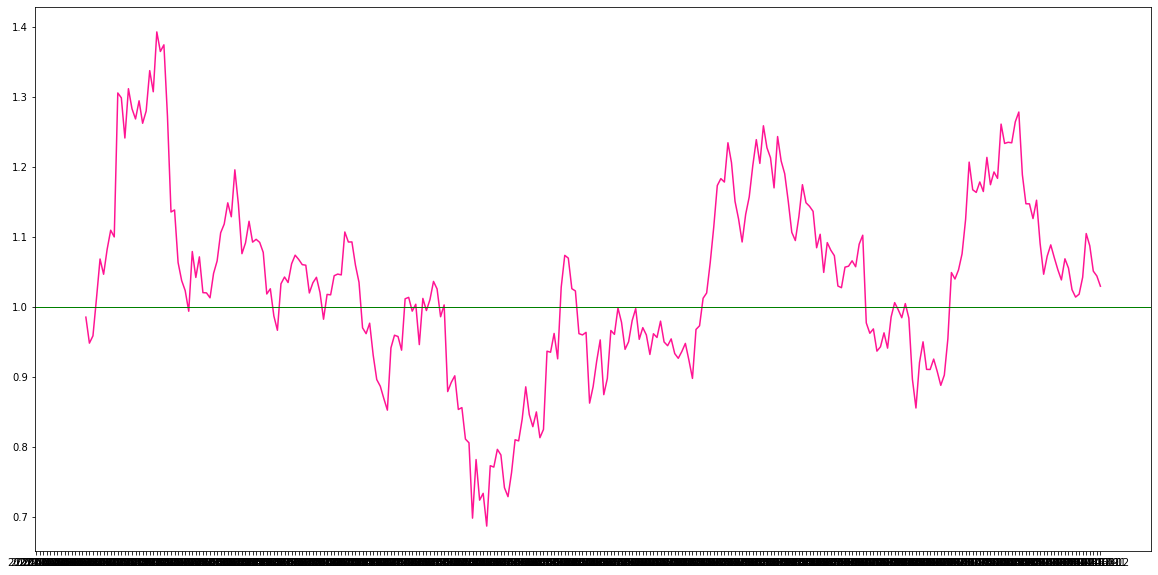

In [158]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['disparity30;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=1, color='g', linewidth=1)

plt.show()


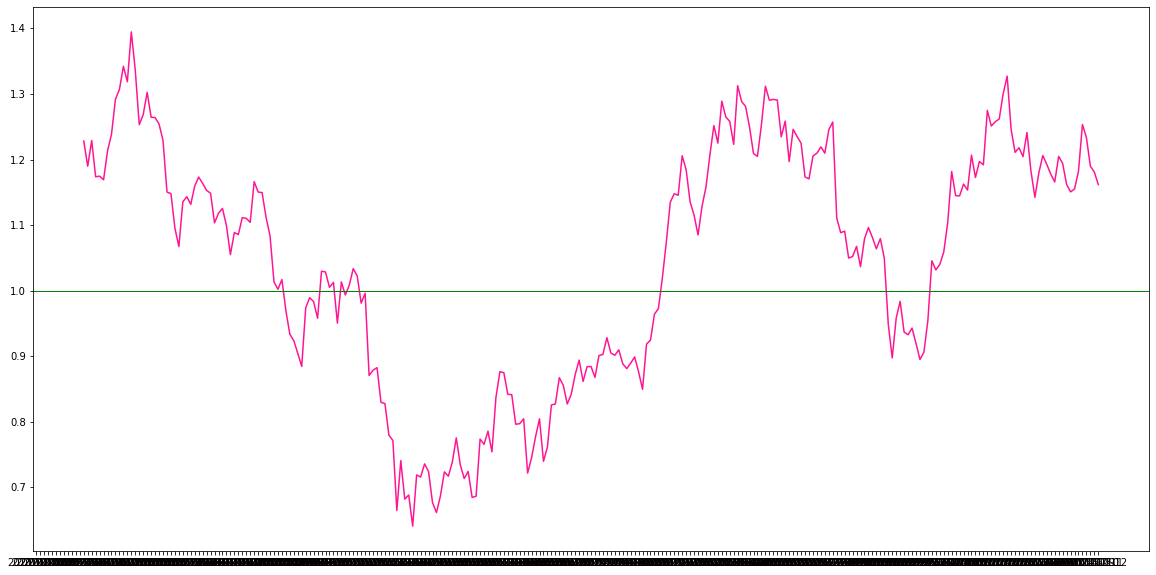

In [159]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['disparity60;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=1, color='g', linewidth=1)

plt.show()


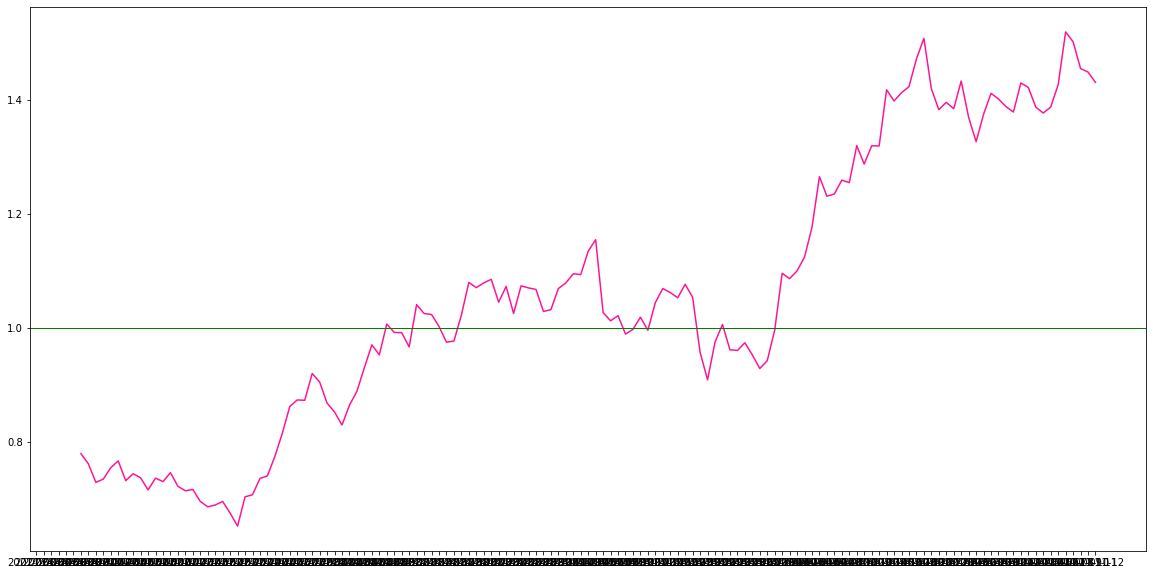

In [160]:
x_values = DF_price['date']	
# y_values = DF_price['s']
z_values = DF_price['disparity180;']

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax2 = plt.subplots()

ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.axhline(y=1, color='g', linewidth=1)

plt.show()